In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import scipy.stats as stats
import math
import collections

In [2]:
data = pd.read_csv('Data/Part3_data.csv',index_col=0)
data.shape

(11552, 40)

In [3]:
data.describe().loc[["min","max","mean","50%","std"]].transpose()

min            max          mean          50%  \
Make_0                     0.0       1.000000      0.001298     0.000000   
Make_1                     0.0       1.000000      0.067780     0.000000   
Make_2                     0.0       1.000000      0.423909     0.000000   
Make_3                     0.0       1.000000      0.612967     1.000000   
Make_4                     0.0       1.000000      0.465114     0.000000   
MonthClaimed               0.0      11.000000      5.372057     5.000000   
WeekOfMonthClaimed         1.0       5.000000      2.701264     3.000000   
MaritalStatus_0            0.0       1.000000      0.005280     0.000000   
MaritalStatus_1            0.0       1.000000      0.692780     1.000000   
MaritalStatus_2            0.0       1.000000      0.303757     0.000000   
Age                        0.0      80.000000     39.903999    38.000000   
PolicyType_0               0.0       1.000000      0.023373     0.000000   
PolicyType_1               0.0       1.000000      0.630454     1.000000   
PolicyType_2               0.0       1.000000      0.349290     0.000000   
PolicyType_3               0.0       1.000000      0.688366     1.000000   
VehiclePrice               0.0       5.000000      1.790426     1.000000   
FraudFound_P               0.0       1.000000      0.059297     0.000000   
Deductible               300.0     700.000000    407.626385   400.000000   
DriverRating               1.0       4.000000      2.493248     2.000000   
Days_Policy_Accident_0     0.0       1.000000      0.004761     0.000000   
Days_Policy_Accident_1     0.0       1.000000      0.006146     0.000000   
Days_Policy_Accident_2     0.0       1.000000      0.996278     1.000000   
Days_Policy_Claim          0.0       2.000000      1.993681     2.000000   
PastNumberOfClaims_0       0.0       1.000000      0.126385     0.000000   
PastNumberOfClaims_1       0.0       1.000000      0.589422     1.000000   
PastNumberOfClaims_2       0.0       1.000000      0.642140     1.000000   
AgeOfVehicle               0.0       7.000000      5.614439     6.000000   
NumberOfSuppliments_0      0.0       1.000000      0.131060     0.000000   
NumberOfSuppliments_1      0.0       1.000000      0.408154     0.000000   
NumberOfSuppliments_2      0.0       1.000000      0.620499     1.000000   
AddressChange_Claim        0.0       4.000000      0.251385     0.000000   
NumberOfCars               0.0       4.000000      0.103445     0.000000   
Year                    1994.0    1996.000000   1994.865824  1995.000000   
ClaimSize                  0.0  104194.696352  22955.500714  8131.105773   
AccidentArea_Urban         0.0       1.000000      0.895429     1.000000   
Sex_Male                   0.0       1.000000      0.844702     1.000000   
Fault_Third Party          0.0       1.000000      0.274238     0.000000   
PoliceReportFiled_Yes      0.0       1.000000      0.028480     0.000000   
WitnessPresent_Yes         0.0       1.000000      0.005886     0.000000   
AgentType_Internal         0.0       1.000000      0.014803     0.000000   

                                 std  
Make_0                      0.036013  
Make_1                      0.251380  
Make_2                      0.494198  
Make_3                      0.487092  
Make_4                      0.498803  
MonthClaimed                3.471926  
WeekOfMonthClaimed          1.258202  
MaritalStatus_0             0.072478  
MaritalStatus_1             0.461361  
MaritalStatus_2             0.459899  
Age                        13.587089  
PolicyType_0                0.151090  
PolicyType_1                0.482703  
PolicyType_2                0.476766  
PolicyType_3                0.463181  
VehiclePrice                1.435649  
FraudFound_P                0.236190  
Deductible                 43.421053  
DriverRating                1.118139  
Days_Policy_Accident_0      0.068839  
Days_Policy_Accident_1      0.078159  
Days_Policy_Accident_2      0.060900  
Days_Policy_C

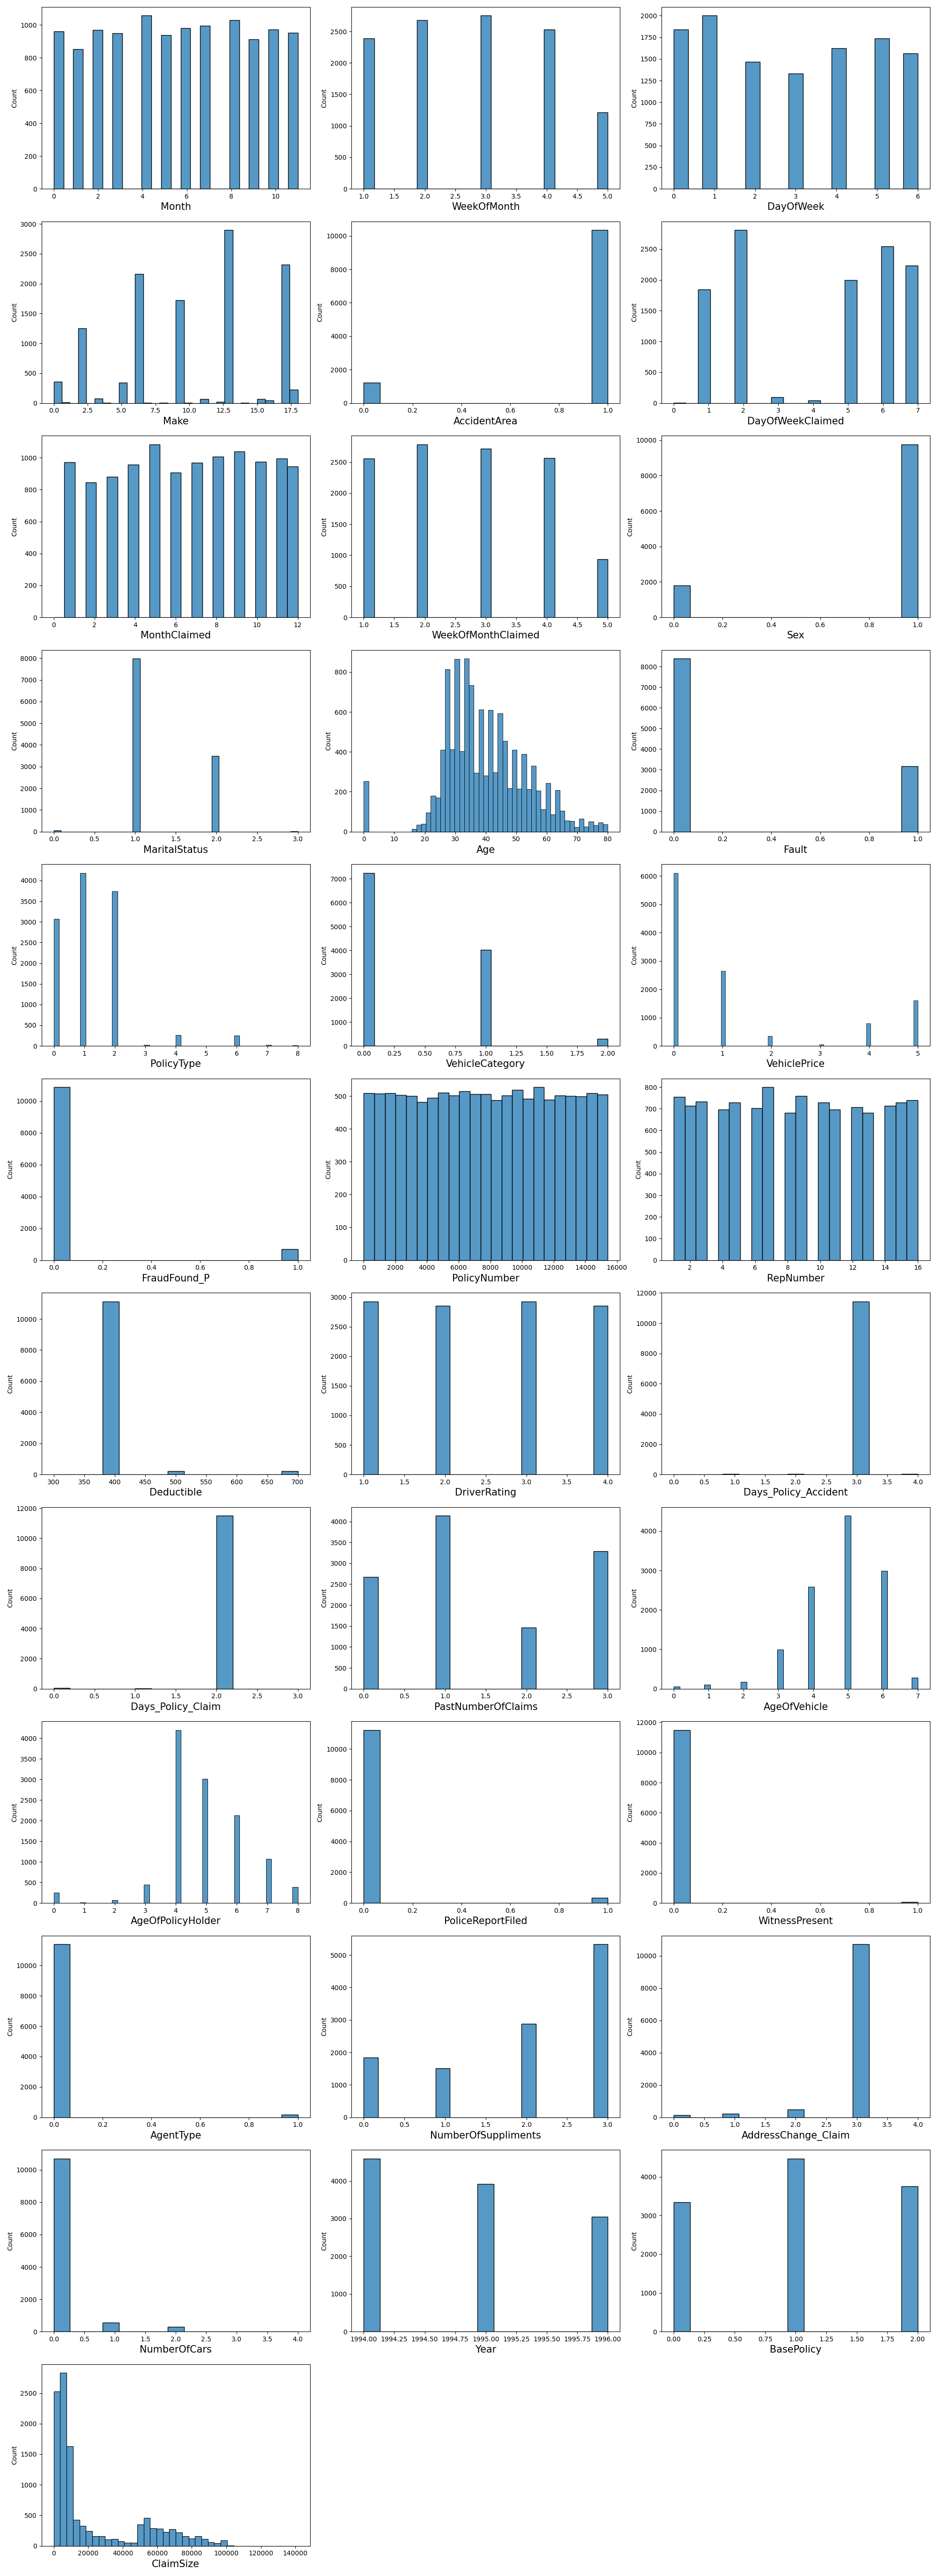

In [4]:
Image("Figures/Part 1/all_distributions.png")

Having a look at the distributions of columns we learn :

- Most of the columns have a boundry (Except Age and Claimsize)
- Some of the categorical data have highly unballanced frequency.
- Age is the only column which has a normal distribution

Decisions :

Conculding a decition is difficult. I prefer to apply different normalization methods and experiment to see which one works the best for my problem.


In [5]:
from sklearn import set_config
set_config(transform_output = "pandas")
ss = preprocessing.StandardScaler()
rs = preprocessing.RobustScaler()
mms = preprocessing.MinMaxScaler()
#data_ = data[data["FraudFound_P"]==1].reset_index()
data_ss = ss.fit_transform(data.drop(columns=["FraudFound_P"]))
data_rs = rs.fit_transform(data.drop(columns=["FraudFound_P"]))
data_mms = mms.fit_transform(data.drop(columns=["FraudFound_P"]))

### Dimentionality Reduction

Dimentionality Reduction can shows us the effect of scalers while visulaising the data

### PCA

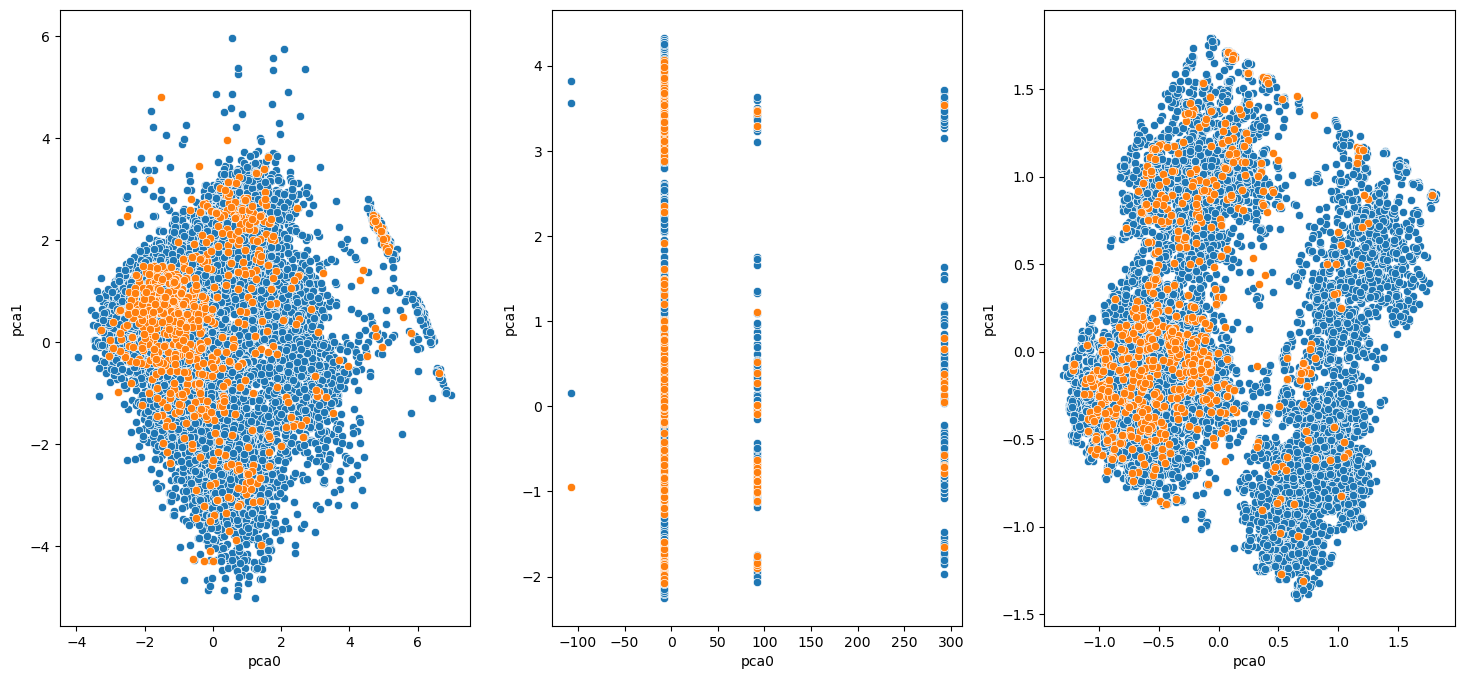

In [6]:
if not os.path.exists('Figures/Part 4'):
    os.makedirs('Figures/Part 4')
    
fig = plt.figure(figsize = (18, 8))
    
pca = PCA(n_components=2)
df_pca_ss = pca.fit_transform(data_ss)
plt.subplot(1, 3, 1)

df_pca_ss['y'] = data["FraudFound_P"]
sns.scatterplot(data = df_pca_ss[df_pca_ss["y"]==0], x = "pca0", y = "pca1")
sns.scatterplot(data = df_pca_ss[df_pca_ss["y"]==1],x = "pca0", y = "pca1")

pca = PCA(n_components=2)
df_pca_rs = pca.fit_transform(data_rs)
plt.subplot(1, 3, 2)

df_pca_rs['y'] = data["FraudFound_P"]
sns.scatterplot(data = df_pca_rs[df_pca_rs["y"]==0], x = "pca0", y = "pca1")
sns.scatterplot(data = df_pca_rs[df_pca_rs["y"]==1],x = "pca0", y = "pca1")

pca = PCA(n_components=2)
df_pca_mms = pca.fit_transform(data_mms)
plt.subplot(1, 3, 3)

df_pca_mms['y'] = data["FraudFound_P"]
sns.scatterplot(data = df_pca_mms[df_pca_mms["y"]==0],x = "pca0", y = "pca1")
sns.scatterplot(data = df_pca_mms[df_pca_mms["y"]==1], x = "pca0", y = "pca1")

plt.show()
fig.savefig('Figures/Part 4/PCA.png')

### UMAP

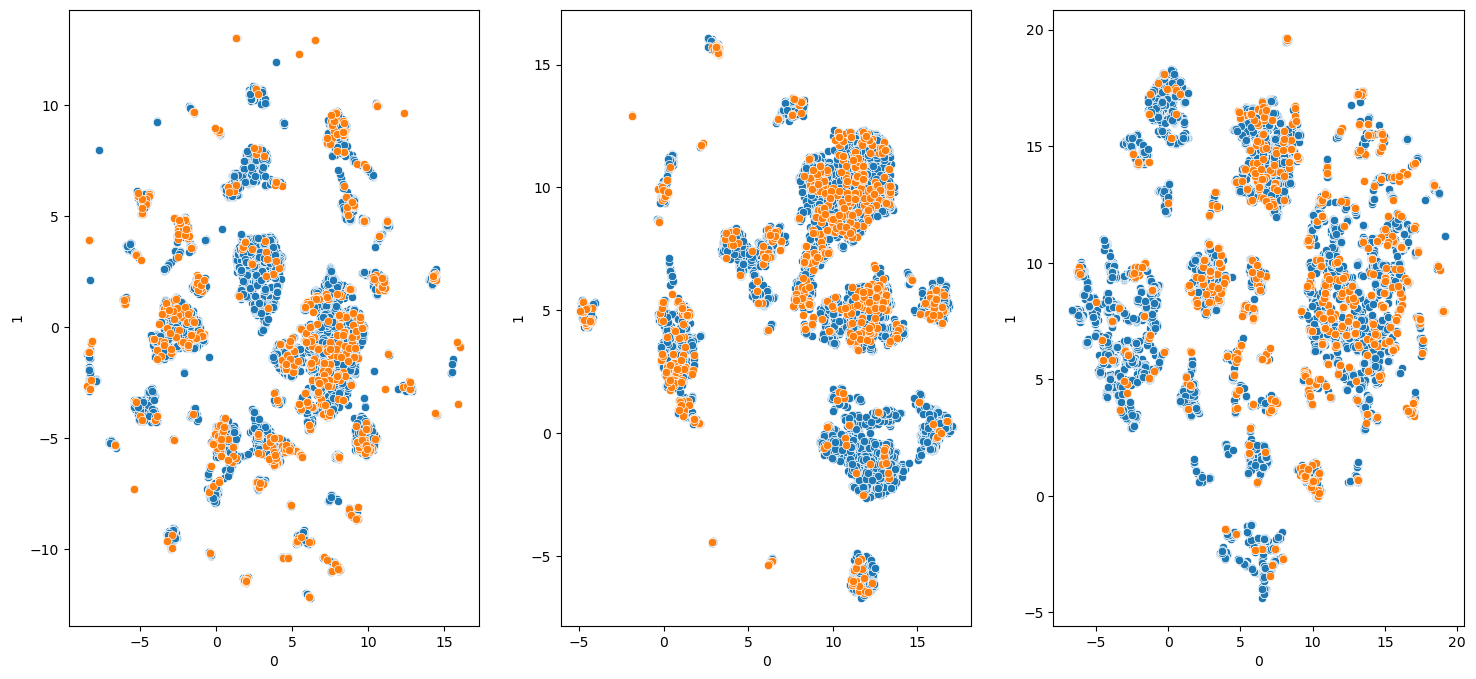

In [7]:
fig = plt.figure(figsize = (18, 8))
    
umap_m = umap.UMAP(
n_components=2, 
n_neighbors=5)
df_umap = umap_m.fit_transform(data_ss)
plt.subplot(1, 3, 1)
df_umap_ss = pd.DataFrame(df_umap)
df_umap_ss['y'] = data["FraudFound_P"]
sns.scatterplot(data = df_umap_ss[df_umap_ss["y"]==0], x = 0, y = 1)
sns.scatterplot(data = df_umap_ss[df_umap_ss["y"]==1], x = 0, y = 1)

umap_m = umap.UMAP(
n_components=2, 
n_neighbors=5)
df_umap = umap_m.fit_transform(data_rs)
plt.subplot(1, 3, 2)
df_umap_rs = pd.DataFrame(df_umap)
df_umap_rs['y'] = data["FraudFound_P"]
sns.scatterplot(data = df_umap_rs[df_umap_rs["y"]==0], x = 0, y = 1)
sns.scatterplot(data = df_umap_rs[df_umap_rs["y"]==1], x = 0, y = 1)

umap_m = umap.UMAP(
n_components=2, 
n_neighbors=5)
df_umap = umap_m.fit_transform(data_mms)
plt.subplot(1, 3, 3)
df_umap_mss = pd.DataFrame(df_umap)
df_umap_mss['y'] = data["FraudFound_P"]
sns.scatterplot(data = df_umap_mss[df_umap_mss["y"]==0], x = 0, y = 1)
sns.scatterplot(data = df_umap_mss[df_umap_mss["y"]==1], x = 0, y = 1)

plt.show()
fig.savefig('Figures/Part 4/UMAP.png')

### TSNE

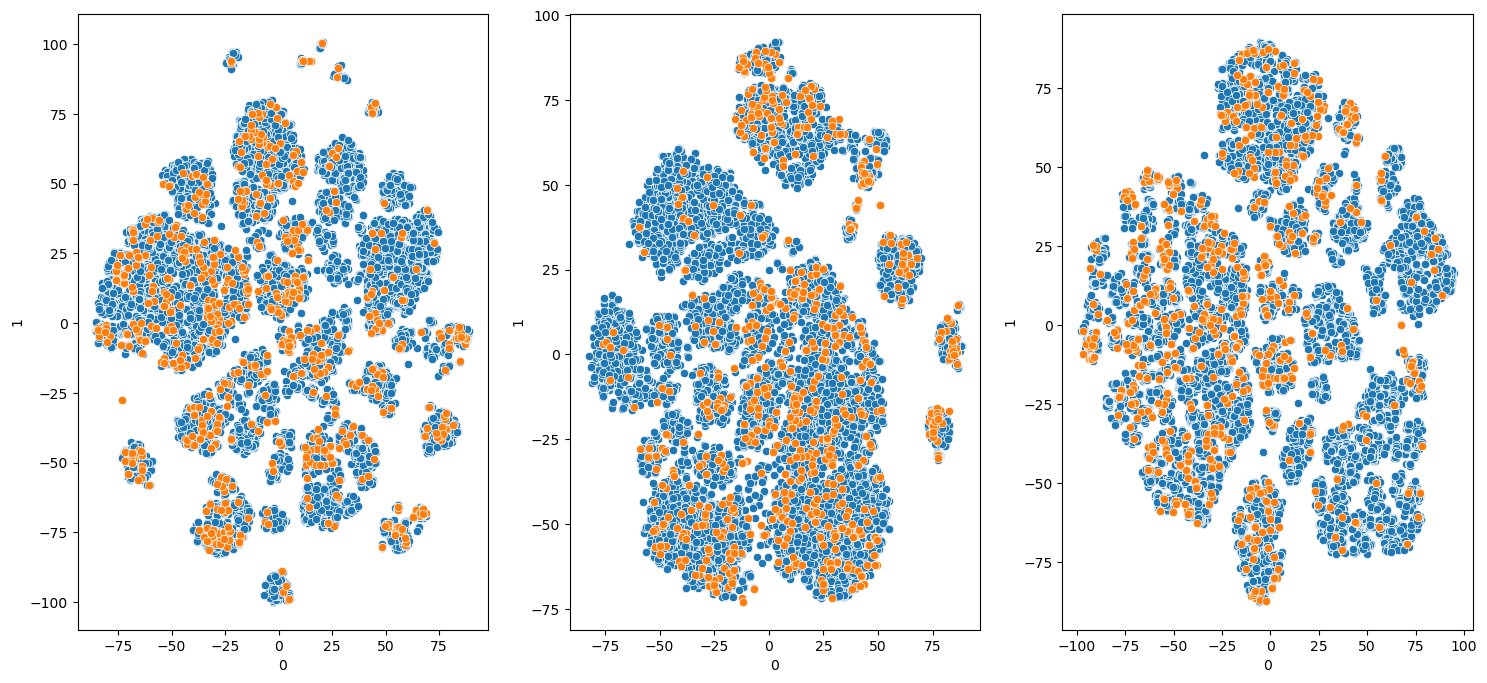

In [8]:
fig = plt.figure(figsize = (18, 8))

tsne = TSNE(
    n_components=2, 
    random_state = 1,
    n_iter = 1000,
    n_jobs = -1
)
df_tsne = tsne.fit_transform(data_ss)
plt.subplot(1, 3, 1)
df_tsne_ss = pd.DataFrame(df_tsne)
df_tsne_ss['y'] = data["FraudFound_P"]
sns.scatterplot(data = df_tsne_ss[df_tsne_ss["y"]==0], x = 0, y = 1)
sns.scatterplot(data = df_tsne_ss[df_tsne_ss["y"]==1], x = 0, y = 1)

tsne = TSNE(
    n_components=2, 
    random_state = 1,
    n_iter = 1000,
    n_jobs = -1
)
df_tsne = tsne.fit_transform(data_rs)
plt.subplot(1, 3, 2)
df_tsne_rs = pd.DataFrame(df_tsne)
df_tsne_rs['y'] = data["FraudFound_P"]
sns.scatterplot(data = df_tsne_rs[df_tsne_rs["y"]==0], x = 0, y = 1)
sns.scatterplot(data = df_tsne_rs[df_tsne_rs["y"]==1], x = 0, y = 1)

tsne = TSNE(
    n_components=2, 
    random_state = 1,
    n_iter = 1000,
    n_jobs = -1
)
df_tsne = tsne.fit_transform(data_mms)
plt.subplot(1, 3, 3)
df_tsne_mss = pd.DataFrame(df_tsne)
df_tsne_mss['y'] = data["FraudFound_P"]
sns.scatterplot(data = df_tsne_mss[df_tsne_mss["y"]==0], x = 0, y = 1)
sns.scatterplot(data = df_tsne_mss[df_tsne_mss["y"]==1], x = 0, y = 1)

plt.show()
fig.savefig('Figures/Part 4/TSNE.png')

Using different dimentionality reduction techniques shows that fraud is spread over the data. Some area seems to have more fraud than the others.

### Clustering

I would like to use different clustering Algorithms to cluster the data and get some insights from the clusters.

In [9]:
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [10]:
data_ss["FraudFound_P"] = data["FraudFound_P"]
data_rs["FraudFound_P"] = data["FraudFound_P"]
data_mms["FraudFound_P"] = data["FraudFound_P"]

In [11]:
def get_stat(model_name,n_clusters,data):
    
    if model_name == "Agglomerative":
        clutering_model = AgglomerativeClustering(n_clusters)
    elif model_name == "KMeans":
        clutering_model = KMeans(n_clusters,n_init=1)
        
    clutering_model.fit_predict(data)
    data['cluster_labels'] = clutering_model.labels_
    
    num_fraud = data.groupby("cluster_labels")["FraudFound_P"].sum()
    total = data.groupby("cluster_labels")["FraudFound_P"].count()
    per_fraud = num_fraud/ total * 100
    
    stat = pd.DataFrame({"num_fraud" : num_fraud.tolist(),"per_fraud" : per_fraud.tolist()})
    
    return stat,clutering_model.labels_

In [12]:
# taking out the binary encoded data columns
names = ["Make","PolicyType","MaritalStatus","Days_Policy_Accident","PastNumberOfClaims","NumberOfSuppliments"]
binary_encoded_columns = [col for name in names for col in data.columns if col.startswith(name)]
nonbinary_encoded_columns = [col for col in data.columns if col not in binary_encoded_columns]

   num_fraud  per_fraud
0          5   0.549451
1         84   3.484032
2         49   3.495007
3        149   7.825630
4        398   8.081218


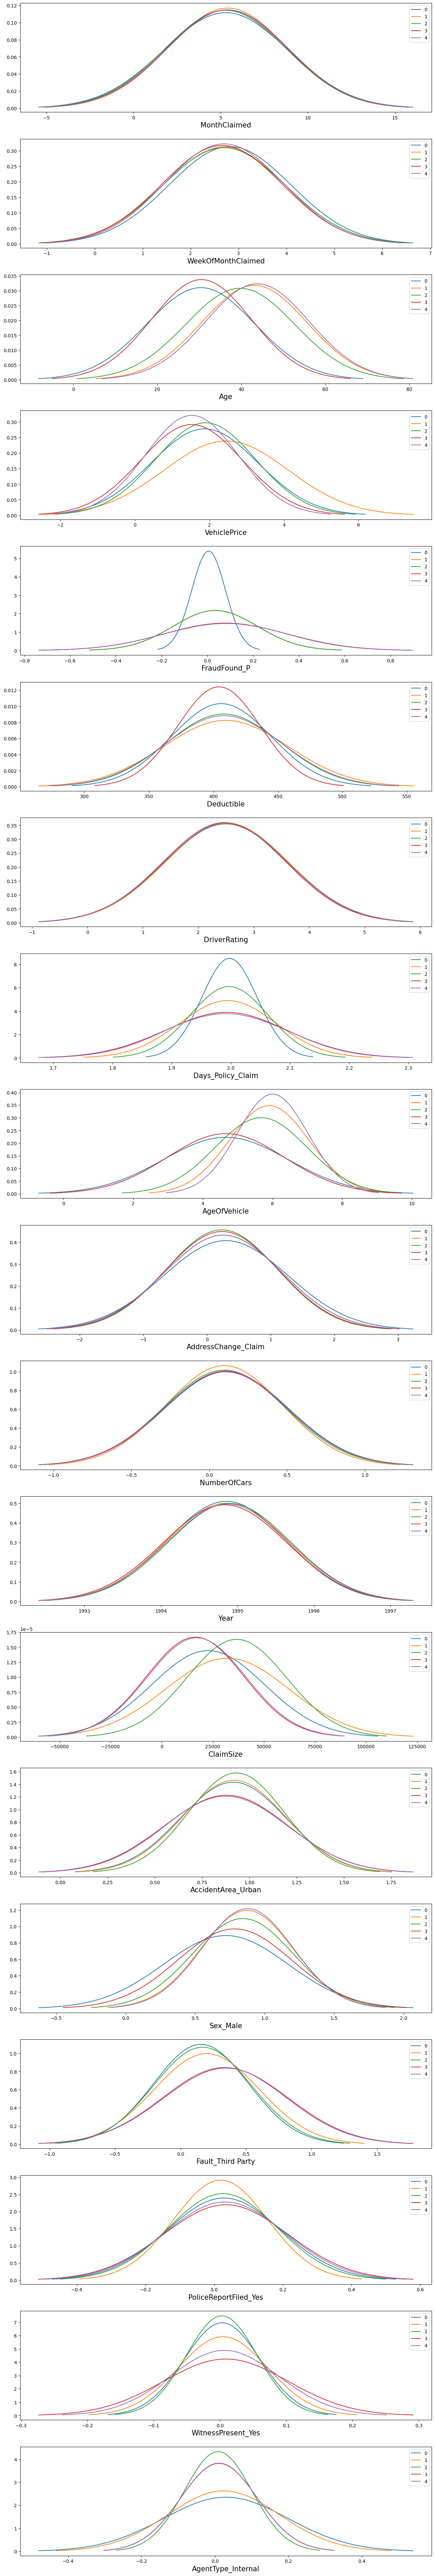

In [13]:
#Use Agglomerative with 5 clusters and MinMax scaled Data
stat, Agg_labels = get_stat("Agglomerative",5,data_mms)
stat = stat.sort_values(by="per_fraud")
print(stat.reset_index(drop=True))
vis_data_1 = data.loc[:,nonbinary_encoded_columns]
vis_data_1['cluster_labels'] = Agg_labels

plt.figure(figsize = (13, 80))
plotnumber = 1
for col in vis_data_1.drop(columns= ['cluster_labels']):
    if plotnumber <= 20:
        ax = plt.subplot(20, 1, plotnumber)
        j =0 
        for i in stat.index :
            mu = vis_data_1[vis_data_1['cluster_labels'] ==i][col].mean()
            sigma = vis_data_1[vis_data_1['cluster_labels'] ==i][col].std()
            x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
            plt.plot(x, stats.norm.pdf(x, mu, sigma),label=str(j))
            j+=1
        ax.legend()
        plt.xlabel(col, fontsize = 15)  
    plotnumber += 1
plt.tight_layout()
plt.show()

### Insights : 

clusters 0,1,2 have a low percentage of fraud, while clusters 3 and 4 have high fraud. I want to consider clusters 0 and 4.

In cluster 4 (the Most Fraudy cluster) :
- the mean of Age is around 45 Years,
- Vehicle price is around 30,000 (low-middle expensive class)
- the mean of Age of vehicle is around 7 years (quite old)
- Claimsize is around 20,000 (not proportionaliy a lot)
- have more male than the other groups
- have more Fault by Third Party 

In cluster 0 (the least Most Fraudy cluster) :
- the mean of Age is around 30 Years,
- Vehicle price is around 38,000 (middle expensive class)
- the mean of Age of vehicle is around 4 years (quite old)
- Claimsize is around 23,000 (not proportionaliy a lot)
- have more females than the other groups
- have more Fault by PolicyHolder

   num_fraud  per_fraud
0          5   0.548847
1         63   2.785146
2         49   3.527718
3         88   7.028754
4        399   8.099878
5         81   9.975369


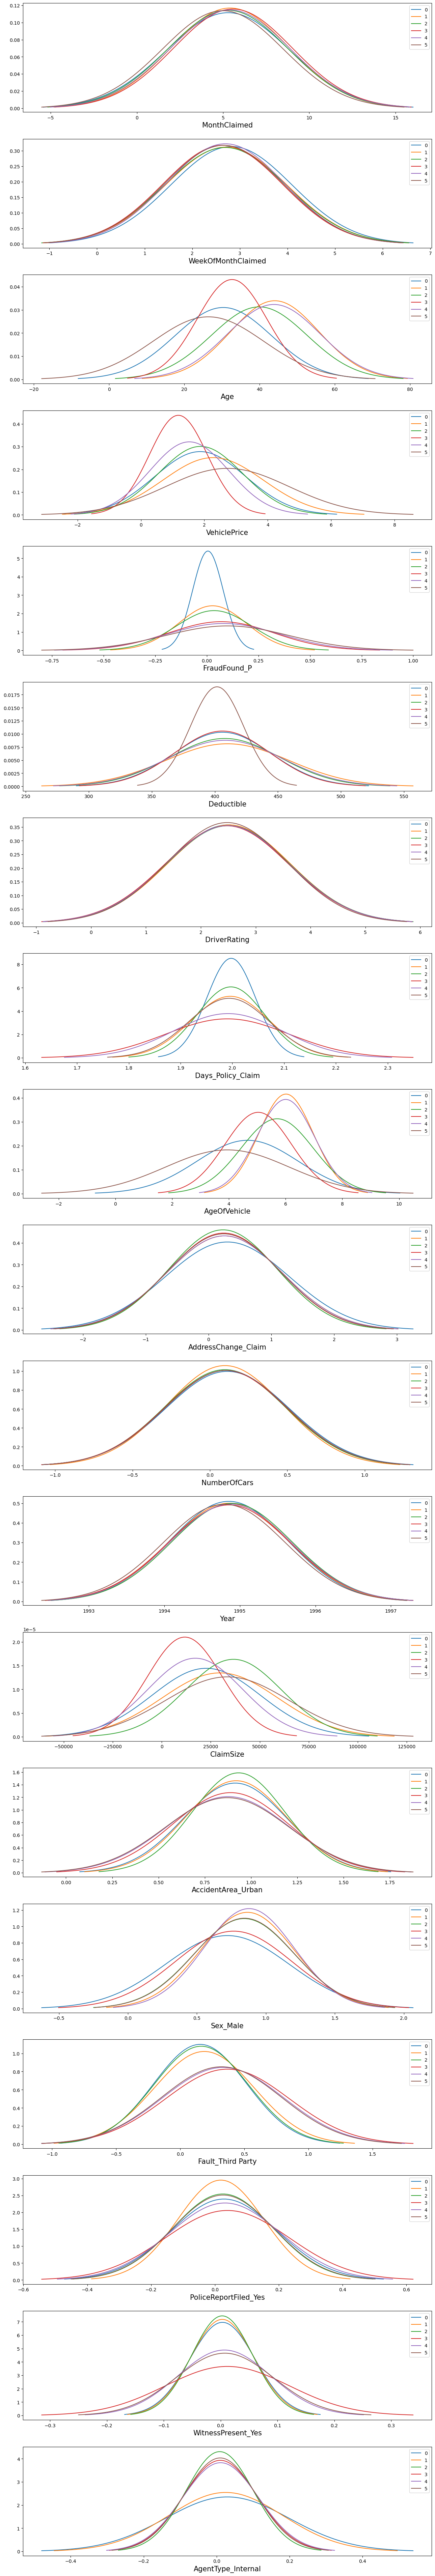

In [14]:
#Use KMeasn with 6 clusters and MinMax scaled Data
stat, KMeans6_labels = get_stat("KMeans",6,data_mms)
stat = stat.sort_values(by="per_fraud")
print(stat.reset_index(drop=True))
vis_data_1 = data.loc[:,nonbinary_encoded_columns]
vis_data_1['cluster_labels'] = KMeans6_labels

plt.figure(figsize = (13, 80))
plotnumber = 1
for col in vis_data_1.drop(columns= ['cluster_labels']):
    if plotnumber <= 20:
        ax = plt.subplot(20, 1, plotnumber)
        j =0 
        for i in stat.index :
            mu = vis_data_1[vis_data_1['cluster_labels'] ==i][col].mean()
            sigma = vis_data_1[vis_data_1['cluster_labels'] ==i][col].std()
            x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
            plt.plot(x, stats.norm.pdf(x, mu, sigma),label=str(j))
            j+=1
        ax.legend()
        plt.xlabel(col, fontsize = 15)  
    plotnumber += 1
plt.tight_layout()
plt.show()

### Insights

In this clustering, I'm more interested in cluster 4 since it has a high number of fraud as well as percentage of fraud :


In cluster 4 (the Most Fraudy cluster) :
- the mean of Age is around 45 Years,
- Vehicle price is around 30,000 (low-middle expensive class)
- the mean of Age of vehicle is around 7 years (quite old)
- Claimsize is around 19,000 (not proportionaliy a lot)
- have more male than the other groups
- have more Fault by Third Party

It is interesting since these insights are similar to the previous clustering insights!


   num_fraud  per_fraud
0         47   3.428155
1        170   5.941978
2        411   6.348471
3         57   6.737589


C:\Users\parvi\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


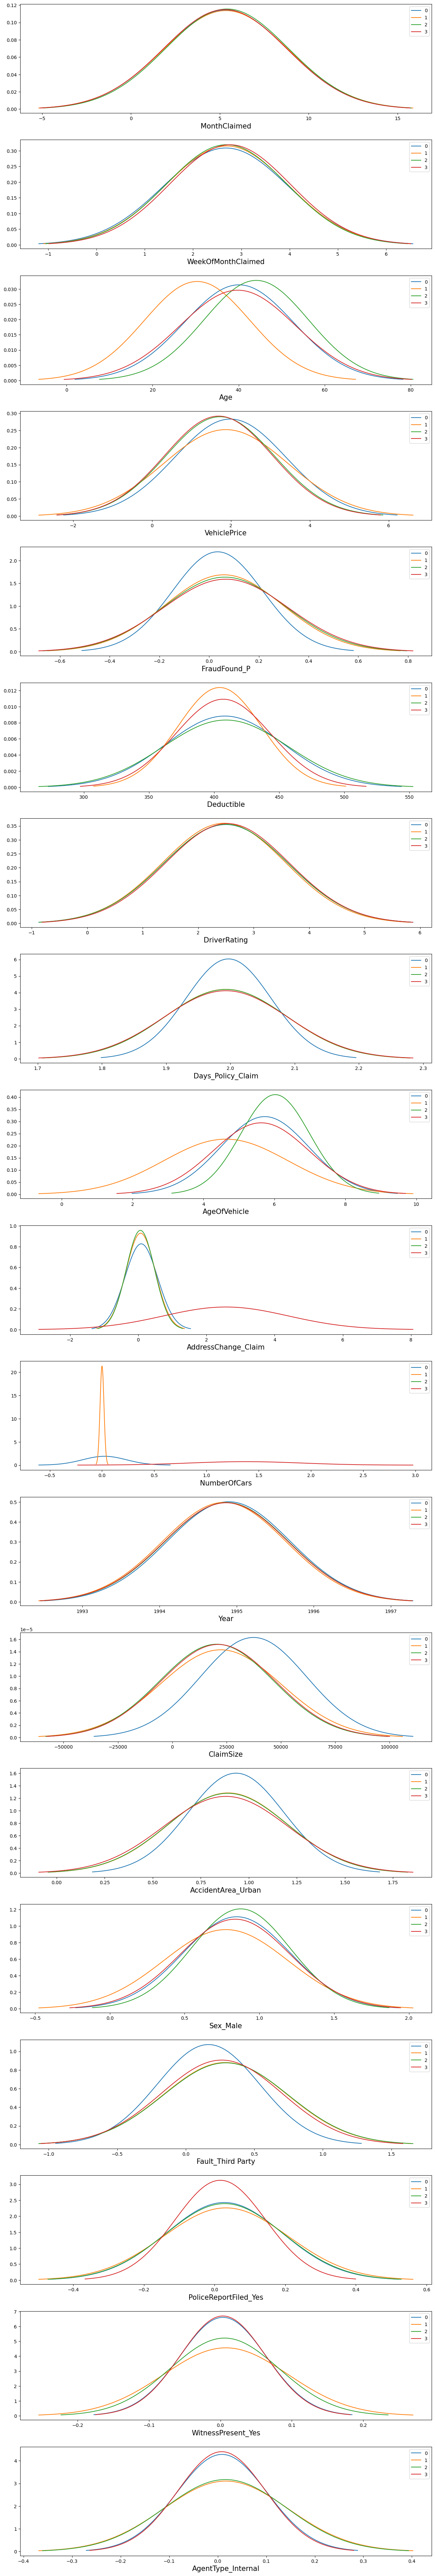

In [15]:
#Use KMeasn with 4 clusters and Standard scaled Data
stat, KMeans4_labels = get_stat("KMeans",4,data_ss)
stat = stat.sort_values(by="per_fraud")
print(stat.reset_index(drop=True))
vis_data_1 = data.loc[:,nonbinary_encoded_columns]
vis_data_1['cluster_labels'] = KMeans4_labels

plt.figure(figsize = (13, 80))
plotnumber = 1
for col in vis_data_1.drop(columns= ['cluster_labels']):
    if plotnumber <= 20:
        ax = plt.subplot(20, 1, plotnumber)
        j =0 
        for i in stat.index :
            mu = vis_data_1[vis_data_1['cluster_labels'] ==i][col].mean()
            sigma = vis_data_1[vis_data_1['cluster_labels'] ==i][col].std()
            x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
            plt.plot(x, stats.norm.pdf(x, mu, sigma),label=str(j))
            j+=1
        ax.legend()
        plt.xlabel(col, fontsize = 15)  
    plotnumber += 1
plt.tight_layout()
plt.show()

### Insights

In this clustering, I'm more interested in cluster 2 since it has a high number of fraud as well as percentage of fraud :


In cluster 2  :
- the mean of Age is around 45 Years,
- Vehicle price is around 32,000
- the mean of Age of vehicle is around 7 years (quite old)
- Claimsize is around 19,000 (not proportionaliy a lot)
- have more male than the other groups
- have more Fault by Third Party

It is interesting since these insights are similar to the previous clustering insights!

In [16]:
data_part2 = pd.read_csv('Data/Part2_data.csv',header=0,index_col=0)
nominal_data = data_part2[names].astype(str)
nominal_data

Make          PolicyType MaritalStatus Days_Policy_Accident  \
0          Honda   Sport - Liability        Single         more than 30   
1          Honda   Sport - Collision        Single         more than 30   
2          Honda   Sport - Collision       Married         more than 30   
3         Toyota   Sedan - Liability       Married         more than 30   
4          Honda   Sport - Collision       Married         more than 30   
...          ...                 ...           ...                  ...   
11548      Mazda   Sedan - Liability       Married         more than 30   
11549  Chevrolet   Sedan - Collision        Single         more than 30   
11550     Toyota   Sedan - Collision       Married         more than 30   
11551     Toyota  Sedan - All Perils       Married         more than 30   
11552     Toyota   Sedan - Collision        Single         more than 30   

      PastNumberOfClaims NumberOfSuppliments  
0                   none                none  
1                   none                none  
2                      1                none  
3                      1         more than 5  
4                      1              1 to 2  
...                  ...                 ...  
11548                  1              1 to 2  
11549               none              1 to 2  
11550             2 to 4                none  
11551               none         more than 5  
11552               none              1 to 2  

[11552 rows x 6 columns]

### Insights for Binary Encoded nominal data

In [34]:
stat, KMeans6_labels = get_stat("KMeans",6,data_mms)
stat = stat.sort_values(by="per_fraud")
nominal_data['cluster_labels'] = KMeans4_labels

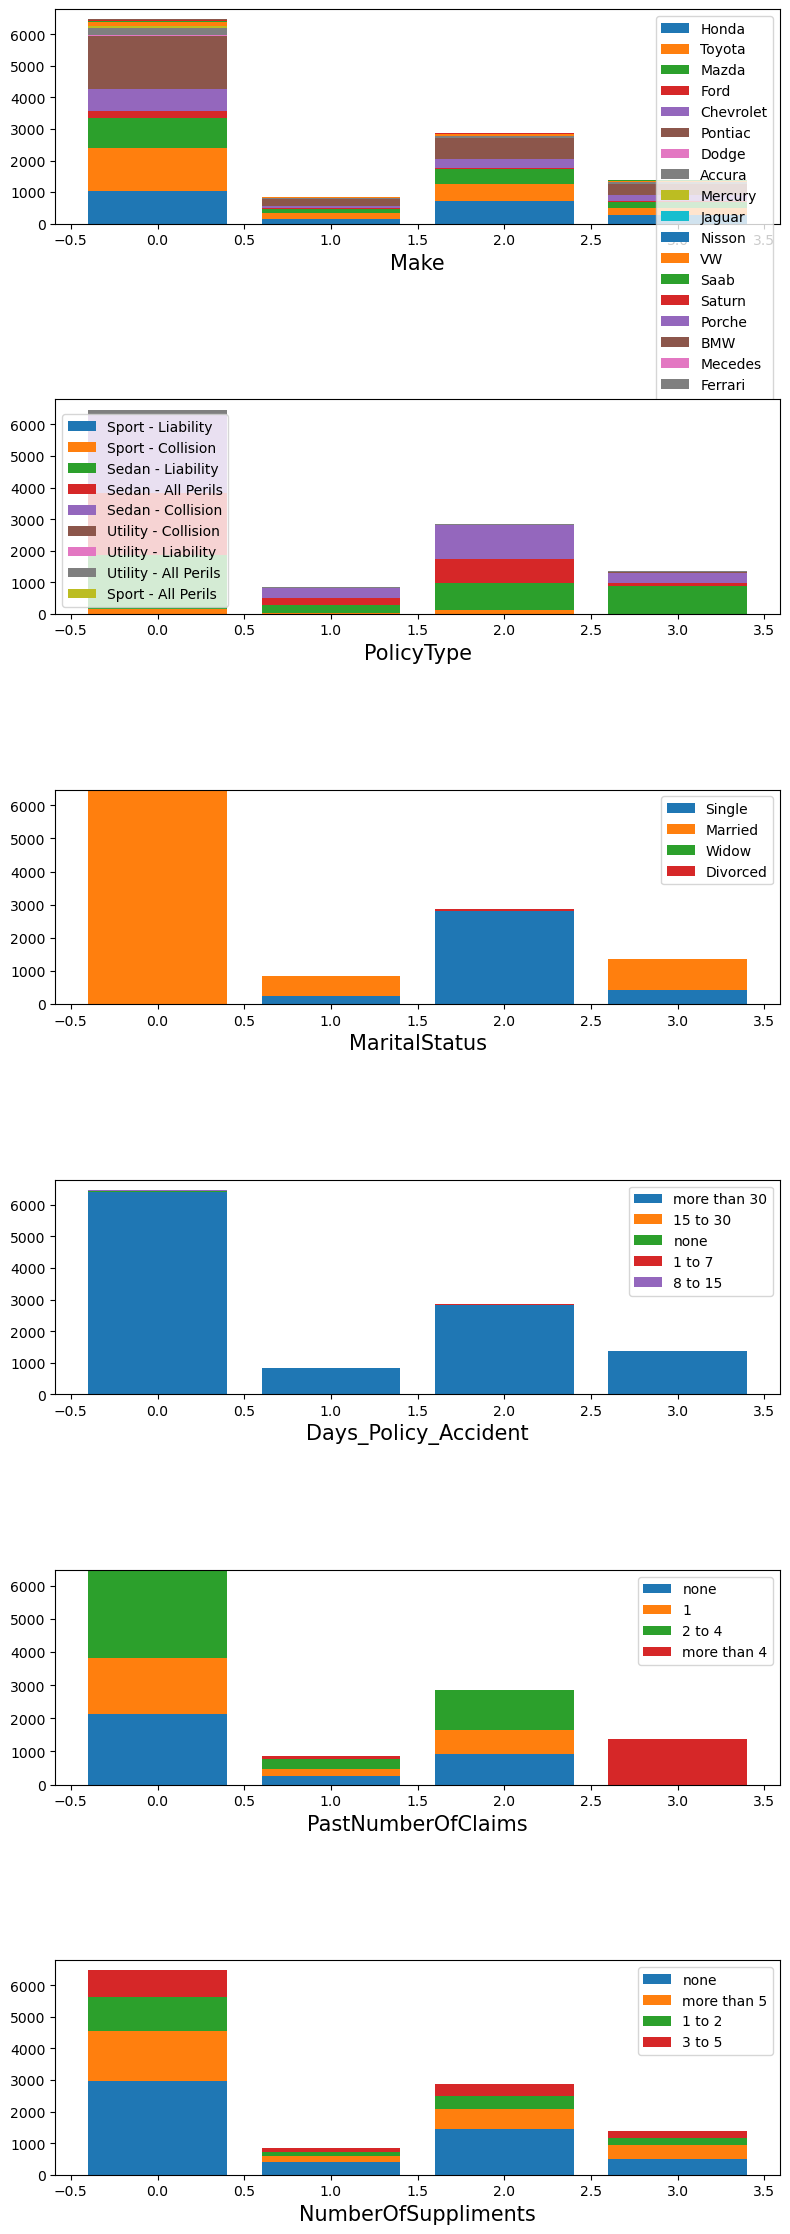

In [36]:
plt.figure(figsize = (8, 100))
plotnumber = 1
index_map = {v: i for i, v in enumerate(stat.index)}
for col in nominal_data.drop(columns= ['cluster_labels']):
    per = np.array([0,0,0,0])
    if plotnumber <= 26:
        ax = plt.subplot(26, 1, plotnumber)
        for category in nominal_data[col].unique():
            values = nominal_data[nominal_data[col] == category].groupby("cluster_labels")["cluster_labels"].count().to_dict()
            for cluster in range(4):
                if cluster not in values.keys():
                    values[cluster] =0 
            values = dict(collections.OrderedDict(sorted(values.items(), key=lambda pair: index_map[pair[0]])))
            p = ax.bar([0,1,2,3] , values.values(),bottom = per,label=category)
            per = np.array(list(values.values())) + per
        plt.xlabel(col, fontsize = 15) 
        ax.legend(nominal_data[col].unique())
    plotnumber += 1
plt.tight_layout()
plt.show()

I will use the clustering for KMeans 6 cluster. we were interested in 4th cluster as it has a high number and percentage of fraud :
- in this cluster there is a high number of past claims (more than 4)

 ### Visualizing the clusters:

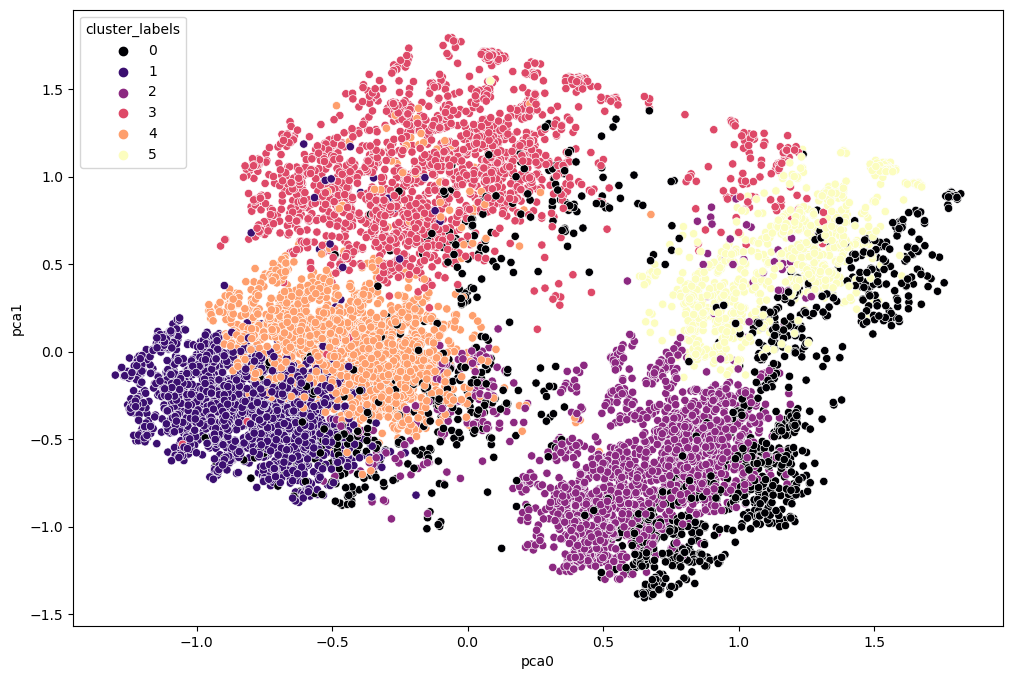

In [40]:
df_pca_mms['cluster_labels'] = KMeans6_labels
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_pca_mms, x = "pca0", y = "pca1", hue = "cluster_labels",  palette = 'magma')
plt.show()

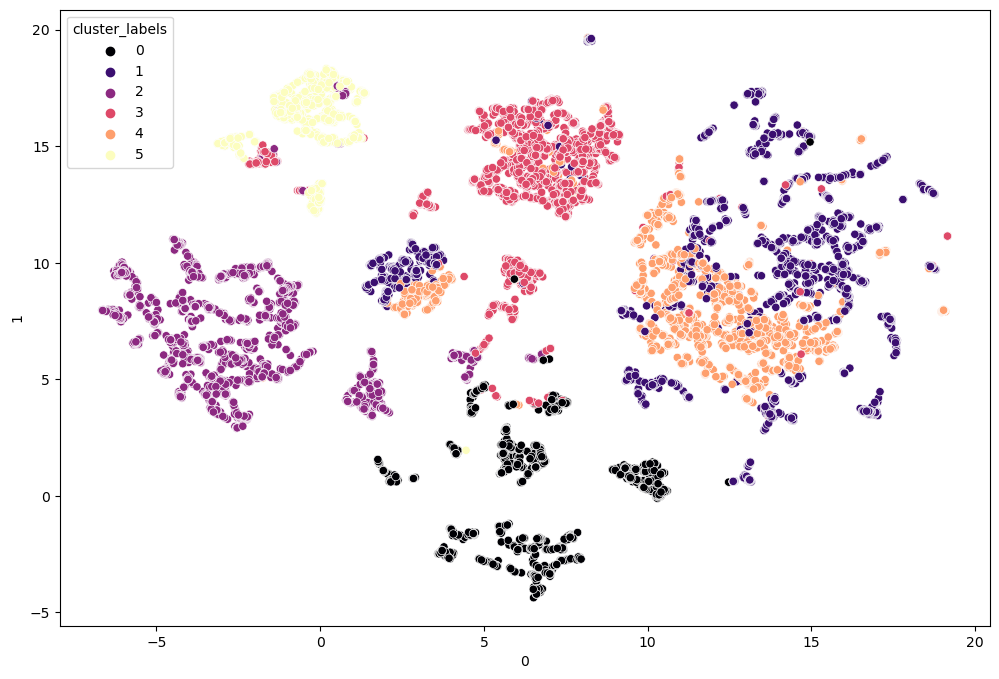

In [44]:
df_umap_mss['cluster_labels'] = KMeans6_labels
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_umap_mss, x = 0, y = 1, hue = "cluster_labels",  palette = 'magma')
plt.show()

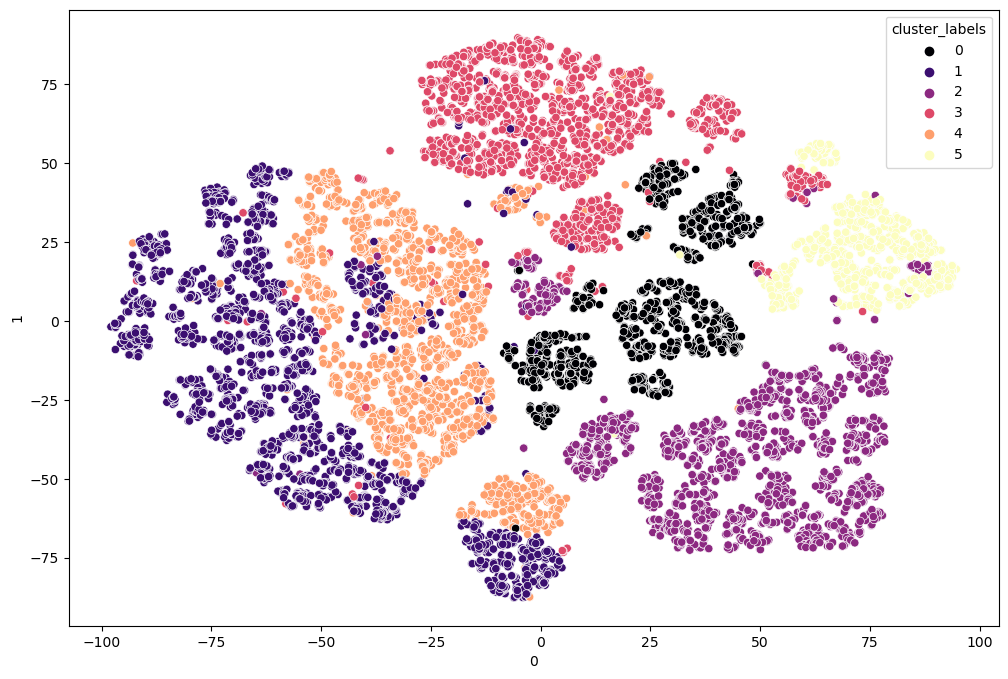

In [45]:
df_tsne_mss['cluster_labels'] = KMeans6_labels
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_tsne_mss, x = 0, y = 1, hue = "cluster_labels",  palette = 'magma')
plt.show()

In this notebook we saw the importance of normalization and used clustering algorithms to cluster the data and get more in depth insights from our data.

I will save all type of noemalized data to use them later in the model training section.

In [46]:
data_ss.to_csv("Data\data_ss.csv")
data_mms.to_csv("Data\data_mms.csv")
data_rs.to_csv("Data\data_rs.csv")